# PROJECT-II

# Abstract

Data description

Data Source:
Dataset fie is downloaded from kaggle :https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb/data?select=AB_NYC_2019.csv
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
This data set contains the details of NYC airbnb in the year 2019 


# Analysis 

In [1]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#using pandas library and 'read_csv' function to read csv file as file already formated for us from Kaggle
airbnb = pd.read_csv('https://raw.githubusercontent.com/SowjanyaDeva/project2/main/project2.csv')

In [3]:
airbnb.describe

<bound method NDFrame.describe of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

     

In [4]:
#looking into the dataset 
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#checking amount of rows in given dataset to understand the size we are working with
airbnb.shape

(48895, 16)

In [6]:
#checking type of every column in the dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
#checking the sum pf null values in each column
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<AxesSubplot:>

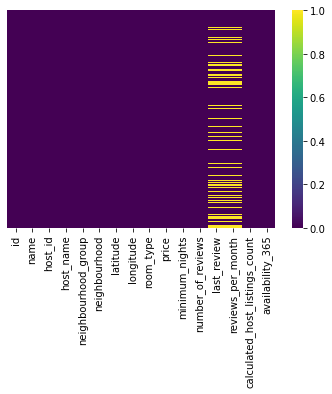

In [8]:
#Used seaborn to create a simple heatmap to see where we are missing data
sns.heatmap(airbnb.isnull(),yticklabels=False,cmap='viridis')

In our case, lost information that's watched does not require as well much extraordinary treatment. Looking into the nature of our dataset we will state encourage things: columns "title" and "host_name" are unimportant and immaterial to our information investigation, columns "last_review" and "review_per_month" require exceptionally straightforward dealing with. To expound, "last_review" is date; in the event that there were no audits for the posting - date essentially will not exist. In our case, this column is unimportant and insignificant subsequently adding those values isn't needed. For "review_per_month" column we will essentially add it with 0.0 for lost values; we will see that in "number_of_review" that column will have a 0, hence taking after this rationale with add up to surveys there will be 0.0 rate of audits per month. Hence, let's continue with evacuating columns that are not imperative and dealing with of lost information.

In [9]:
#dropping the unecessary columns
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [10]:
airbnb.describe

<bound method NDFrame.describe of                                                     name   host_id  \
0                     Clean & quiet apt home by the park      2787   
1                                  Skylit Midtown Castle      2845   
2                    THE VILLAGE OF HARLEM....NEW YORK !      4632   
3                        Cozy Entire Floor of Brownstone      4869   
4       Entire Apt: Spacious Studio/Loft by central park      7192   
...                                                  ...       ...   
48890    Charming one bedroom - newly renovated rowhouse   8232441   
48891      Affordable room in Bushwick/East Williamsburg   6570630   
48892            Sunny Studio at Historical Neighborhood  23492952   
48893               43rd St. Time Square-cozy single bed  30985759   
48894  Trendy duplex in the very heart of Hell's Kitchen  68119814   

      neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749

In [11]:
airbnb.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [12]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)

In [13]:
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

In [14]:
#remove the null values from the dataset
airbnb=airbnb[~(airbnb['name']=='0')]

In [15]:
airbnb["name"].fillna('0', inplace = True)

In [16]:
airbnb.name.isnull().sum()

0

In [17]:
airbnb.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<AxesSubplot:>

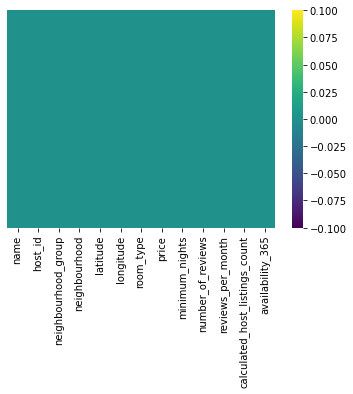

In [18]:
#Used seaborn to create a simple heatmap to see where we are missing data
sns.heatmap(airbnb.isnull(),yticklabels=False,cmap='viridis')

# EDA 

<AxesSubplot:>

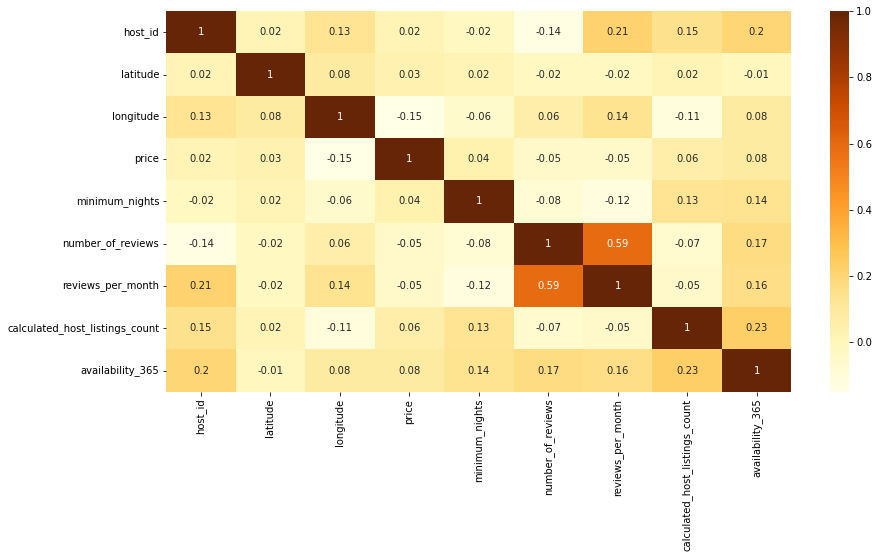

In [19]:
#correlation for our data 
correlation = airbnb.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

<AxesSubplot:>

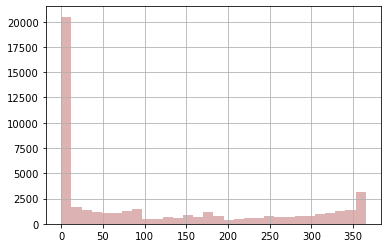

In [20]:
#histrogram using mat.lib for availability
airbnb['availability_365'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:>

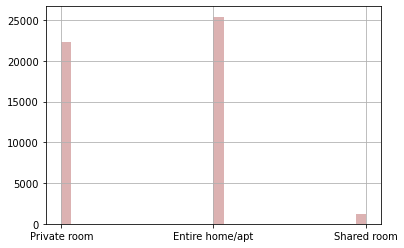

In [21]:
#histrogram using mat.lib room_type
airbnb['room_type'].hist(bins=30,color='darkred',alpha=0.3)

In [22]:
#prining the columns of our dataset for easy reference 
airbnb.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

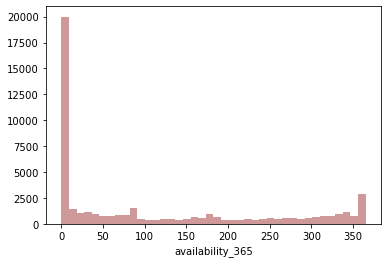

In [23]:
#histogram using seaborn , kde-kernal desity estimation=false it will give a histogram'
sns.distplot(airbnb['availability_365'],kde=False,color='darkred',bins=40)
warnings.filterwarnings('ignore')

Categorize the neighbourhood group into categories and checking against room type

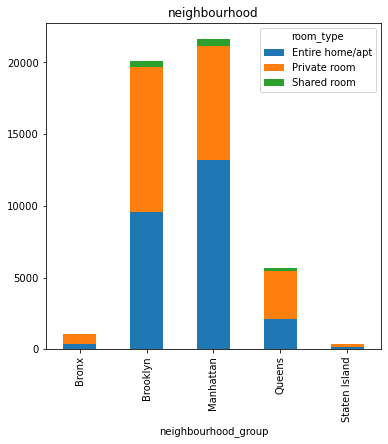

In [24]:
neighbourhood_group=pd.DataFrame(pd.crosstab(airbnb.neighbourhood_group, airbnb.room_type)).reset_index()
ax=neighbourhood_group.plot(x="neighbourhood_group",kind='bar', stacked=True,
        title='neighbourhood',figsize=(6,6))

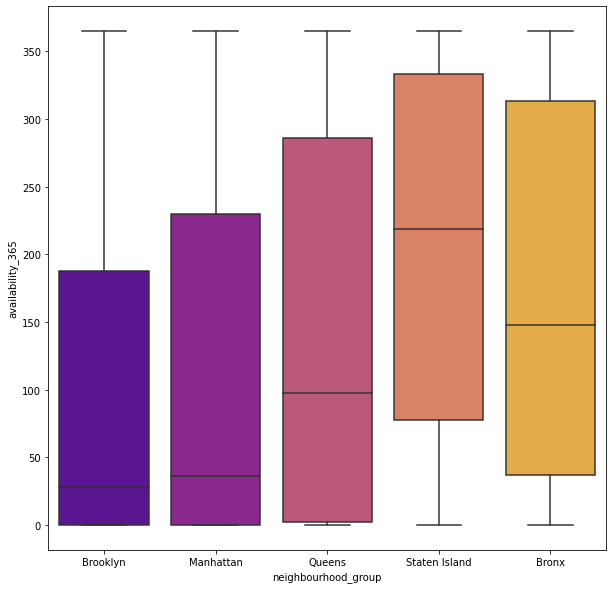

In [25]:
#box plot for nighbourhood and avalibility365
plt.figure(figsize=(10,10))
df1 = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

<AxesSubplot:xlabel='room_type', ylabel='count'>

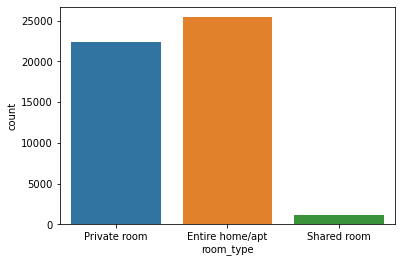

In [26]:
sns.countplot(x='room_type',data=airbnb)

# HYPOTHESIS:

# Question1

Demand for the room price varies according to review? here I guess the demand for rooms are varying according to the review this can be found by the analysis

In [27]:
q1=airbnb.groupby(['price']).mean()
q1

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,,,,,,,,
0,5.862573e+07,40.712058,-73.925670,7.363636,34.272727,1.579091,4.272727,120.909091
10,9.768142e+07,40.729329,-73.936397,4.058824,14.176471,0.922941,1.235294,70.705882
11,1.051506e+08,40.738027,-73.925720,3.333333,37.666667,1.286667,1.000000,259.666667
12,2.886539e+07,40.714980,-73.970378,76.750000,2.000000,0.147500,1.000000,99.000000
13,1.581790e+08,40.631360,-74.125590,1.000000,9.000000,5.510000,3.000000,8.000000
...,...,...,...,...,...,...,...,...
7703,1.561588e+08,40.768240,-73.959890,1.000000,0.000000,0.000000,12.000000,146.000000
8000,1.177497e+06,40.691370,-73.967230,1.000000,1.000000,0.030000,11.000000,365.000000
8500,1.812846e+07,40.721970,-74.006330,30.000000,2.000000,0.180000,1.000000,251.000000


In [28]:
#finding the count of number of review
airbnb.number_of_reviews.count()

48895

In [29]:
#finding the groupby for number of reviews for our analysis 1
columns = ['number_of_reviews','price']
question1=airbnb.groupby('number_of_reviews')[columns].mean()
question1

,number_of_reviews,price
number_of_reviews,,
0,0.0,192.919021
1,1.0,149.422387
2,2.0,148.238961
3,3.0,144.200000
4,4.0,144.995988
...,...,...
576,576.0,47.000000
594,594.0,49.000000
597,597.0,49.000000


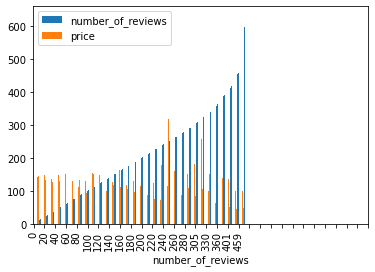

In [30]:
question1.plot(kind='bar')
x_labels=[]
for i in range(629):
  if i%20==0:
    x_labels.append(i)
plt.xticks(x_labels,fontsize=10, color='black')
plt.show()

YES, our hypothesis is true the price of rooms decreases or depends on number of reviews we observe that in the above graph 

# Question2

Demand for the room type changes according to the price? here I guess the demand from are varying according to the type of room can be found from the analysis

In [31]:
airbnb.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

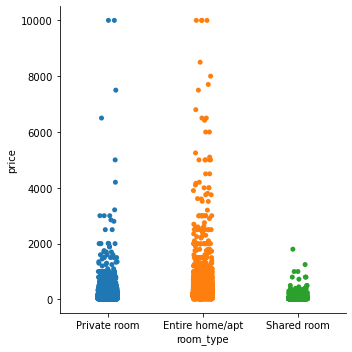

In [32]:
sns.catplot(x="room_type", y="price", data=airbnb);

NO,our hypothesis is wrong here we can get an entire home in the same price as a private or shared room has 

# Question3

Variation between minumun_night&number of reviews in different regions here we can see the demand for both minumun_night&number of reviews in different regions''

In [33]:
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [34]:
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

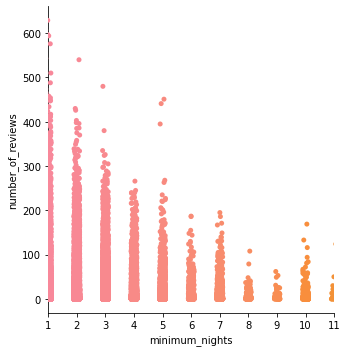

In [35]:
graph=sns.catplot(x="minimum_nights", y="number_of_reviews", data=airbnb);
graph.set(xlim=(0, 10))

From the above analysis it can be stat that regaredless to reviews min_no_of nights are avaliable 

# Question4

Brooklyn is one of the most traveled destinations?lets us see in the analysis 

In [36]:
#Categorize the neighbourhood group into categories 
airbnb.neighbourhood_group = airbnb.neighbourhood_group.astype('category')

In [37]:
airbnb.neighbourhood_group

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: category
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [38]:
#print the categories in neighbourhood group
airbnb.neighbourhood_group.cat.categories

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object')

In [39]:
pd.crosstab(airbnb.neighbourhood_group, airbnb.room_type)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


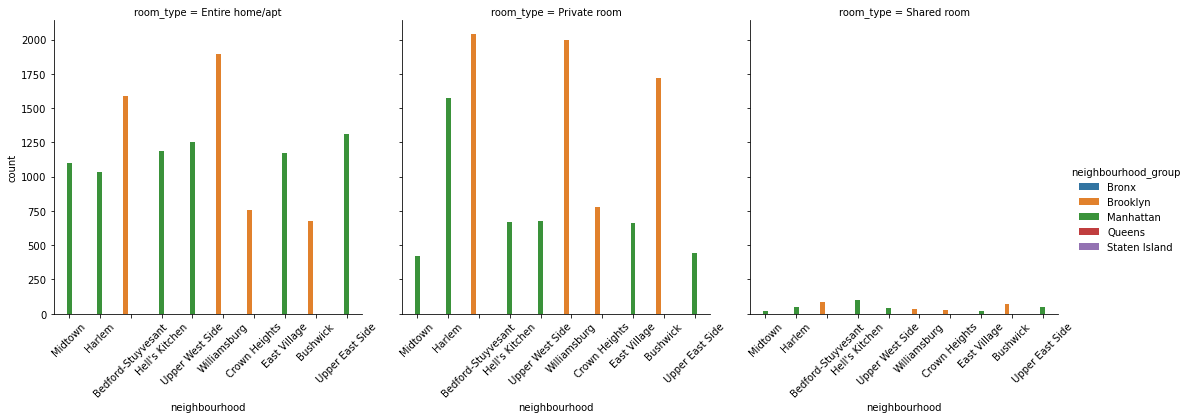

In [40]:
question4=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=question4, kind='count')
viz_3.set_xticklabels(rotation=45)

Yes,our analysis is correct in this case from the above graph we can observe that brooklyn is most traveled destinations
in that  Harlem is most visited for Brooklyn.

# Question5

Since we analysised that Brooklyn is most visted place so the entir rooms avalibility would also be hight in brooklyn let us see in the analysis 

1.let us plot a count plot to find the count of rooms 

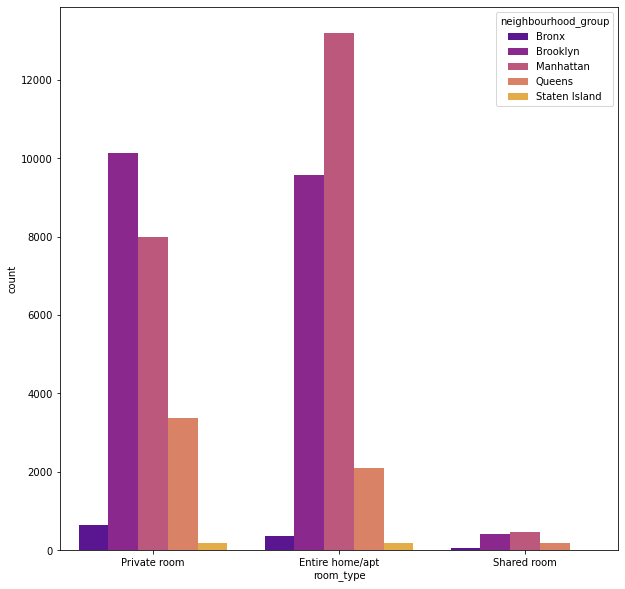

In [41]:
plt.figure(figsize=(10,10))
df1 = sns.countplot(airbnb['room_type'],hue=airbnb['neighbourhood_group'], palette='plasma')

No, our analysis is wrong even throught brooklyn is most visited place but entire home avalibility is hight in Manhattan

# Question6

Manhattan would be the most reviewed state in our analysis let us see in the below analysis

In [42]:
#finding the most reviewed locations
reviewed=airbnb.nlargest(10,'number_of_reviews')
reviewed

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


<AxesSubplot:xlabel='neighbourhood_group'>

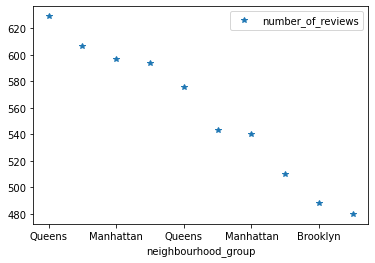

In [43]:
reviewed.plot(x='neighbourhood_group', y='number_of_reviews', style='*')

Our analysis is wrong queens seems to have hight number of reviews than manhattan

# Conclusion
Highlights would offer assistance to decide the best-reviewed has for NYC together with 'number_of_review' column that's given. Generally, we found a really great number of curiously relationships between highlights and clarified each step of the method. This information analytics is exceptionally much mirrored on a better level on Airbnb Data/Machine Learning group for superior commerce choices, control over the stage, promoting activities, usage of unused highlights and much more.